In [ ]:
!pip install pysiology

In [ ]:
from google.colab import files
files.upload()

In [3]:
#@title Fix
import os,shutil
os.remove("/usr/local/lib/python3.10/dist-packages/pysiology/electromyography.py")
shutil.move("/content/electromyography.py","/usr/local/lib/python3.10/dist-packages/pysiology/electromyography.py")

'/usr/local/lib/python3.10/dist-packages/pysiology/electromyography.py'

In [ ]:
! wget -r -N -c -np https://physionet.org/files/gaitndd/1.0.0/

In [5]:
import pysiology
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os,shutil

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore. https://doi.org/10.1007/978-981-13-8950-4_35


In [6]:
#EDA
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
# from mlxtend.classifier import StackingCVClassifier

In [ ]:
data_1 = pd.read_csv("physionet.org/files/gaitndd/1.0.0/als1.ts",delimiter="\t",names=["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)",
                                                      "Right Swing Interval (sec)","Left Swing Interval (% of stride)","Right Swing Interval (% of stride)",
                                                      "Left Stance Interval (sec)","Right Stance Interval (sec)","Left Stance Interval (% of stride)",
                                                      "Right Stance Interval (% of stride)","Double Support Interval (sec)","Double Support Interval (% of stride)"])

data_1.head()

In [ ]:
dataset_path = "physionet.org/files/gaitndd/1.0.0"
dict_data = {'MNF': [], 'MDF': [],'PeakFrequency': [], 'MNP': [],'TTP': [], 'SM1': [],'SM2': [], 'SM3': []
  ,'FR': [], 'PSR': [], 'VCF': [],'IEMG': [], 'MAV': [], 'MAV1': [], 
 'MAV2': [], 'SSI': [], 'VAR': [], 'TM3': [], 'TM4': [], 'TM5': [],  
 'LOG': [], 'RMS': [], 'WL': [], 'AAC': [], 'DASDV': [], 'ZC': [], 'MYOP':[],   
 'WAMP': [], 'SSC': [], 'MAVSLPk1':[],"MAVSLPk2":[],"MAVSLPk3":[],"label":[]}
  
folders = [os.path.join(dataset_path, folder_name) for folder_name in os.listdir(dataset_path) if str(folder_name).endswith(".ts")]  
  
labels = ["als","control","hunt","park"]
for folder in folders:  
  if(re.split("\d", str(folder.split("/")[4]))[0] != "example"):
    df = pd.read_csv(folder,delimiter="\t",names=["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)",  
                                                      "Right Swing Interval (sec)","Left Swing Interval (% of stride)","Right Swing Interval (% of stride)",  
                                                      "Left Stance Interval (sec)","Right Stance Interval (sec)","Left Stance Interval (% of stride)",  
                                                      "Right Stance Interval (% of stride)","Double Support Interval (sec)","Double Support Interval (% of stride)"])
    target = ["Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)","Right Swing Interval (sec)",
              "Left Stance Interval (sec)","Right Stance Interval (sec)","Double Support Interval (sec)"] 
    label = labels.index(re.split("\d", str(folder.split("/")[4]))[0]) 
    for f in target:
      data = df[f]
      analyzedEMG = pysiology.electromyography.analyzeEMGnew(data,samplerate=200,preprocessing=False) 
      time,freq = analyzedEMG

      freq = analyzedEMG[freq]
      keys1 = list(freq.keys())

      for i in keys1 :
        dict_data[i].append(freq[i])

      time = analyzedEMG[time]
      keys2 = list(time.keys())[:-1]

      for i in keys2 :
        dict_data[i].append(time[i])

      dict_data["MAVSLPk1"].append(time["MAVSLPk"][0])
      dict_data["MAVSLPk2"].append(time["MAVSLPk"][1])
      dict_data["MAVSLPk3"].append(time["MAVSLPk"][2])
      dict_data["label"].append(label)

dataFrame = pd.DataFrame(dict_data)

In [ ]:
dataFrame

In [ ]:
dataFrame.iloc[:60,:16]

In [ ]:
dataFrame.iloc[:60,16:]

In [8]:
dataFrame.columns

Index(['MNF', 'MDF', 'PeakFrequency', 'MNP', 'TTP', 'SM1', 'SM2', 'SM3', 'FR',
       'PSR', 'VCF', 'IEMG', 'MAV', 'MAV1', 'MAV2', 'SSI', 'VAR', 'TM3', 'TM4',
       'TM5', 'LOG', 'RMS', 'WL', 'AAC', 'DASDV', 'ZC', 'MYOP', 'WAMP', 'SSC',
       'MAVSLPk1', 'MAVSLPk2', 'MAVSLPk3', 'label'],
      dtype='object')

In [9]:
dataFrame =  dataFrame.drop(columns='FR')
dataFrame =  dataFrame.drop(columns='ZC')
dataFrame =  dataFrame.drop(columns='MYOP')

In [ ]:
# !pip -q install dataprep

In [ ]:

# from dataprep.eda import plot, plot_correlation, plot_missing,create_db_report,create_report
# report = create_report(dataFrame)
# report

In [10]:
dataFrame["label"].unique()

array([2, 1, 0, 3])

In [ ]:
  als = dataFrame[dataFrame.label == 0]
  control = dataFrame[dataFrame.label==1]
  hunt = dataFrame[dataFrame.label==2]
  park = dataFrame[dataFrame.label==3]

In [ ]:
def plot_scatter(x,y):
  fig, ax = plt.subplots()
  fig.set_size_inches(13, 7) 
  # lables and scatter points
  ax.scatter(als[x], als[y], label="als", facecolor="blue")
  ax.scatter(control[x], control[y], label="control", facecolor="green")
  ax.scatter(hunt[x], hunt[y], label="hunt", facecolor="red")
  ax.scatter(park[x], park[y], label="park", facecolor="Yellow")
  ax.set_xlabel(x)
  ax.set_ylabel(y)
  ax.grid()
  ax.set_title("")
  ax.legend()

In [ ]:
plot_scatter('MNF', 'MDF')

In [ ]:
plot_scatter('WL', 'AAC')

In [ ]:
# plt.figure(figsize=(50,50))
# sns.heatmap(dataFrame.corr())

# Main function

In [37]:
def Main(dataFrame,columns):
    models = {
        'Logistic Regression':LogisticRegression(max_iter=5000,solver='lbfgs', fit_intercept=True,intercept_scaling=1),
        "Naive Bayes":GaussianNB( var_smoothing=1e-018),
        'Support Vector ':SVC(kernel='rbf', C=2, max_iter=-1),
        "Decision Tree":DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 32),
        "Random Forest": RandomForestClassifier(n_estimators=26, random_state=2,max_depth=5),
        "K-Neighbors":KNeighborsClassifier(n_neighbors=16),
        "Extreme Gradient Boost":XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),
        "Ada Boost":AdaBoostClassifier(n_estimators=500, learning_rate = 0.75),
        "LDA":LinearDiscriminantAnalysis(),
        "MLP":MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,solver='sgd',  random_state=21,tol=0.000000001)
    }
    acc_score={}
    colors = ['red','green','blue','Cyan','Lime','yellow','orange',"DeepPink","OrangeRed","DarkMagenta"]
    y, X = dataFrame['label'], dataFrame.loc[:,columns].astype('float64')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    score = []
    models_names = list(models.keys())
    for i in models_names:
      models[i].fit(X_train, y_train)
      predict = models[i].predict(X_test)
      acc = accuracy_score(y_test, predict)
      score.append(acc*100)
    acc_score["Model"] = models_names
    acc_score["Accuracy"] = score
    frame =  pd.DataFrame(acc_score)
    plt.figure(figsize=(20,10))
    plt.title("barplot Represent Accuracy of different models")
    plt.xlabel("Algorithms")
    plt.ylabel("Accuracy %")
    plt.bar(frame['Model'],frame['Accuracy'],color = colors)
    plt.show()
    return [frame,models.copy()]

# filter

In [66]:
def filter(dataFrame,name):
    min = dataFrame[name].min().astype('float64')
    std = dataFrame[name].std().astype('float64')
    data = dataFrame.loc[:,[name,'label']].astype('float64')
    for x in data.index:
      if data.loc[x, name] > min+std or data.loc[x, name] < min-std:
        data.drop(x, inplace = True)
    return data

In [69]:
filter(dataFrame,'SM1')

,SM1,label
0,0.498224,2.0
1,0.753189,2.0
2,0.121463,2.0
3,0.206851,2.0
4,0.536163,2.0
...,...,...
443,0.094979,0.0
444,0.082909,0.0
445,0.518111,0.0
446,0.384435,0.0


In [68]:
filter(dataFrame,'WL')

,WL,label
0,15.5939,2.0
1,17.9602,2.0
2,10.0031,2.0
3,9.1360,2.0
4,11.9565,2.0
...,...,...
442,12.7688,0.0
443,6.0160,0.0
444,6.1196,0.0
445,13.0866,0.0


# main with filter

In [62]:
def filterMain(dataFrame,name):
    min = dataFrame[name].min().astype('float64')
    std = dataFrame[name].std().astype('float64')
    data = dataFrame.loc[:,[name,'label']].astype('float64')
    for x in data.index:
      if data.loc[x, name] > min+std or data.loc[x, name] < min-std:
        data.drop(x, inplace = True)
    if (len(data.index) > 250):
      [a,s] = Main(data,[name])
      return [a,s,data]
    else :
      print(data)
      return [1,2,3]


In [63]:
[a,d,f] =filterMain(dataFrame,'MNF')

          MNF  label
155  3.469734    2.0
157  2.191025    2.0
159  3.468165    2.0
160  1.799191    2.0


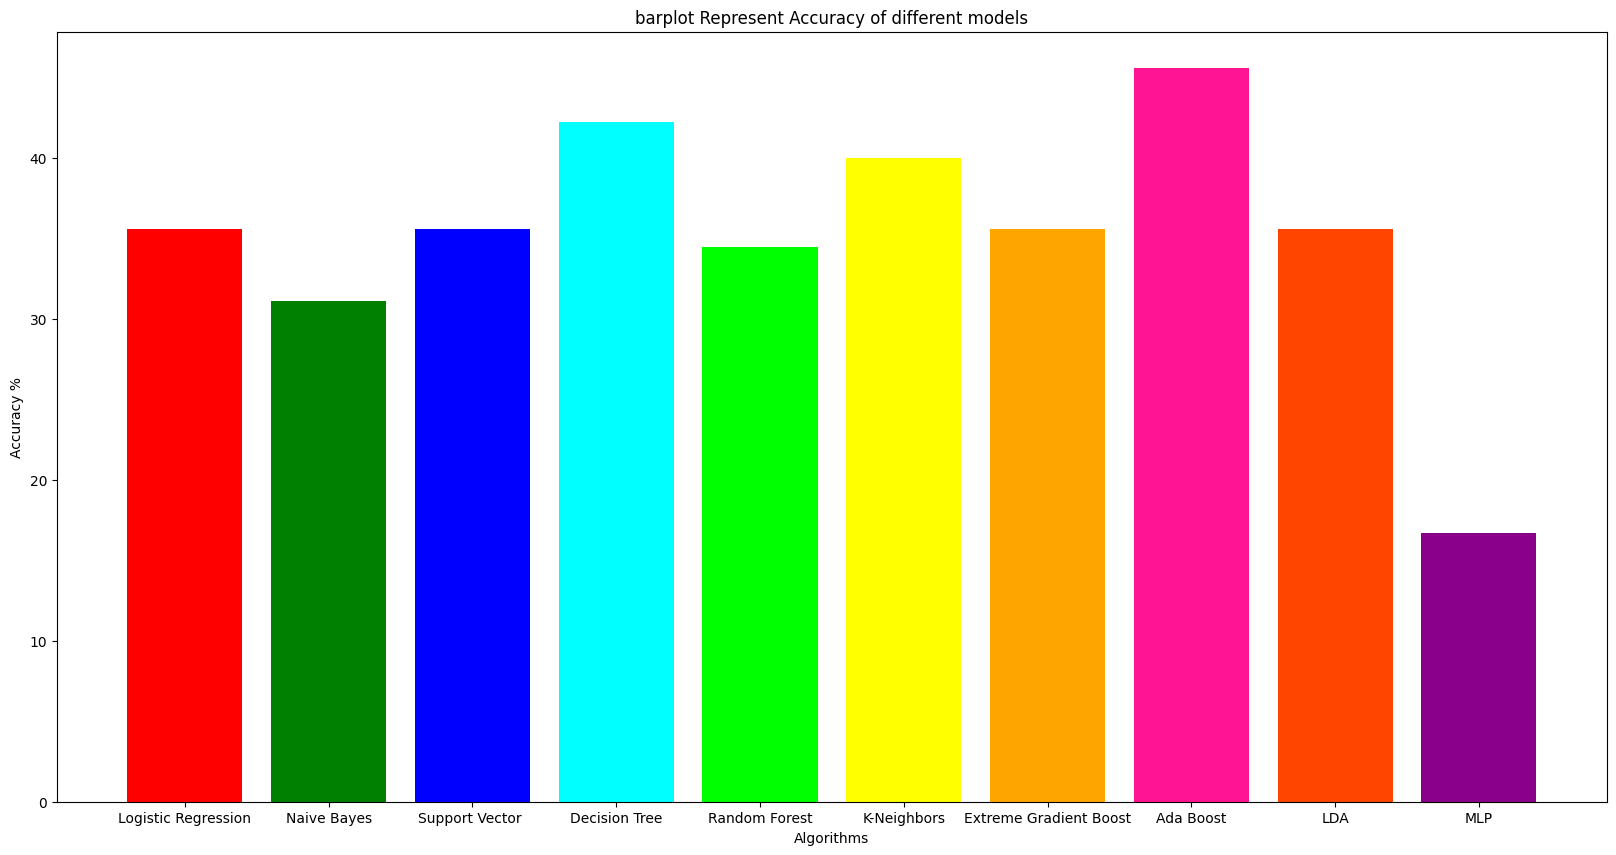

In [57]:
[a,d,f] =filterMain(dataFrame,'TM5')

# feature_selection SequentialFeatureSelector

In [74]:
from sklearn.svm import SVR
from sklearn.feature_selection import SequentialFeatureSelector

y, X = dataFrame['label'], dataFrame.drop(columns='label').astype('float64')


knn = KNeighborsClassifier(n_neighbors=10)
sfs = SequentialFeatureSelector(knn, n_features_to_select=10)
sfs.fit(X, y)
selected_features = list(X.columns[sfs.get_support()])
selected_features

['MNP', 'TTP', 'SM1', 'SM2', 'SM3', 'PSR', 'MAV1', 'TM5', 'WL', 'AAC']

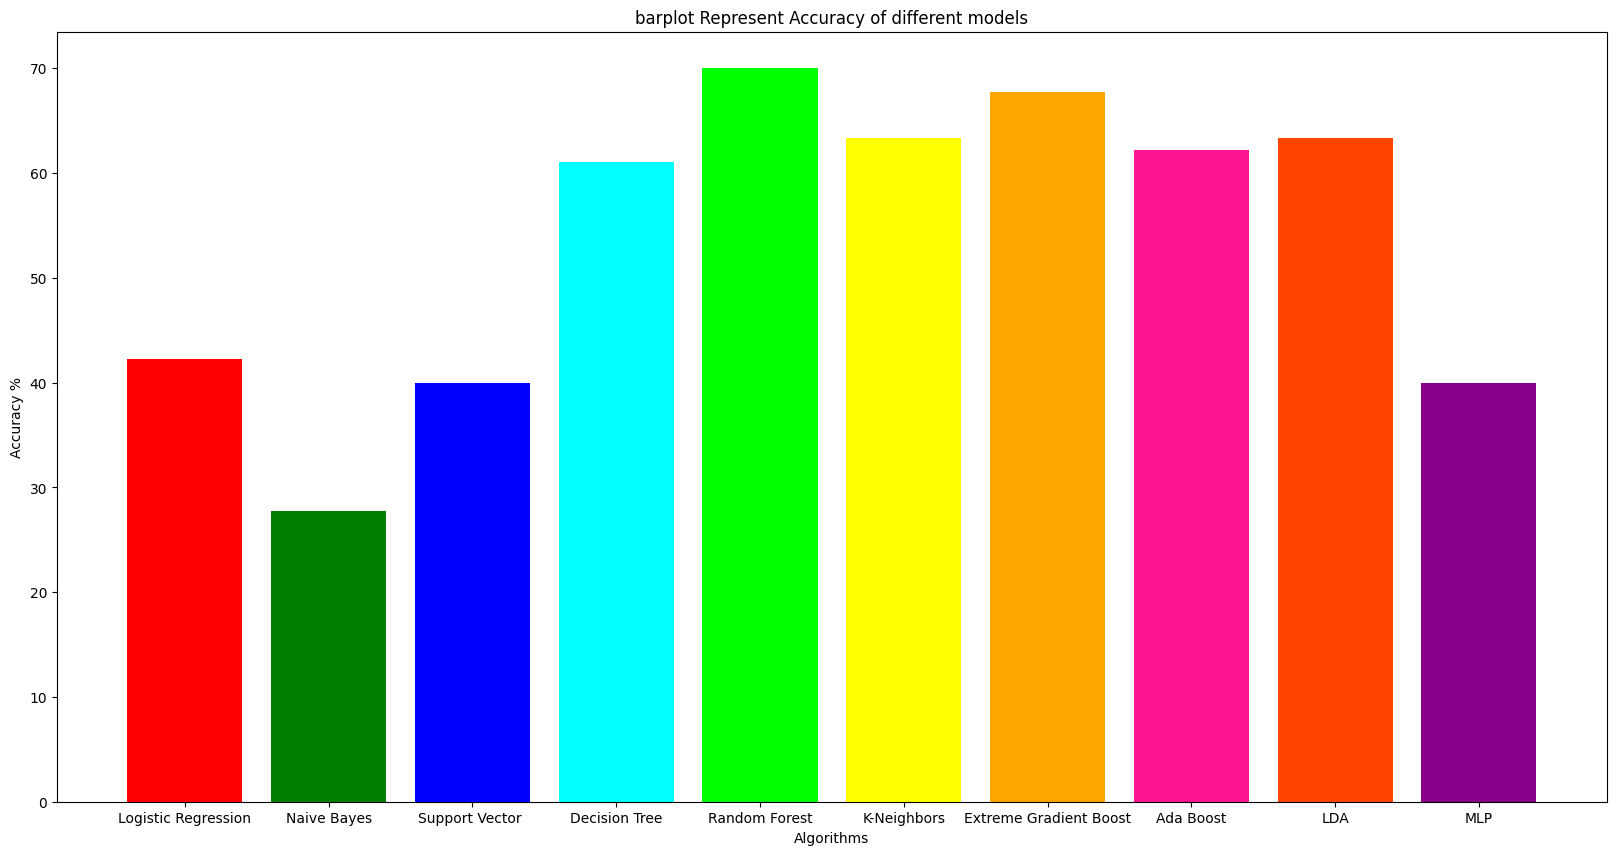

In [76]:
[acc, models ]=Main(dataFrame,selected_features)

# feature selection RFECV

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
y, X = dataFrame['label'], dataFrame.drop(columns='label').astype('float64')
estimator =LogisticRegression()

selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)

selected_features = list(X.columns[selector.support_])


In [79]:
selected_features

['RMS', 'WL', 'DASDV', 'MAVSLPk1', 'MAVSLPk2', 'MAVSLPk3']

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


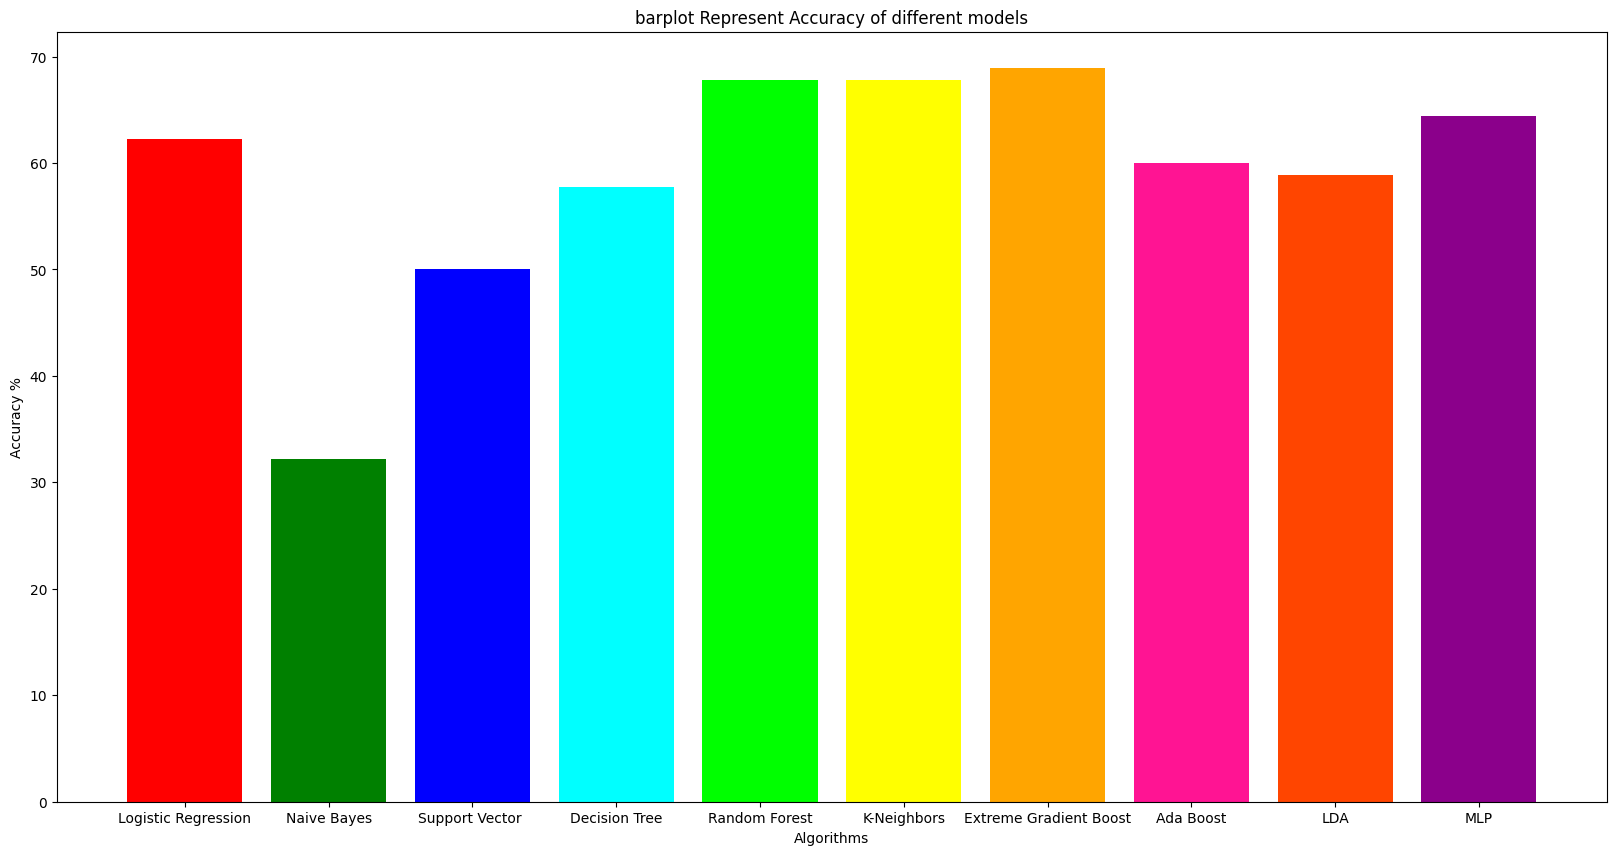

In [80]:
[acc, models ]=Main(dataFrame,selected_features)

# filterAllTable base on the selected_features

In [98]:
def filterAllTable(dataFrame,selected_features):
  std={}
  min={}
  for i in selected_features:
    min[i] = dataFrame[i].min().astype('float64')
    std[i] =dataFrame[i].std().astype('float64')
  selected_features.append("label")
  df = dataFrame[selected_features]
  for i in selected_features[:-1]:
    for j in df[i].index:
      if df.loc[j, i] > min[i]+std[i] or df.loc[j, i] < min[i]-std[i]:
        df = df.drop(j)
  return df

bestData = filterAllTable(dataFrame,selected_features)
bestData

,RMS,WL,DASDV,MAVSLPk1,MAVSLPk2,MAVSLPk3,label
0,1.059600,15.5939,0.011369,1.053528,1.064677,1.053185,2
1,1.060594,17.9602,0.016630,1.053216,1.064639,1.053530,2
2,0.384178,10.0031,0.003649,0.388431,0.380613,0.376705,2
3,0.395574,9.1360,0.003745,0.387393,0.400079,0.392107,2
4,0.678789,11.9565,0.010066,0.665093,0.684059,0.676478,2
...,...,...,...,...,...,...,...
442,1.756759,12.7688,0.010385,1.777232,1.713458,1.767045,0
443,0.473807,6.0160,0.002563,0.469685,0.460568,0.486417,0
444,0.534248,6.1196,0.003103,0.540498,0.529683,0.527162,0
445,1.280558,13.0866,0.013072,1.273209,1.261949,1.291579,0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


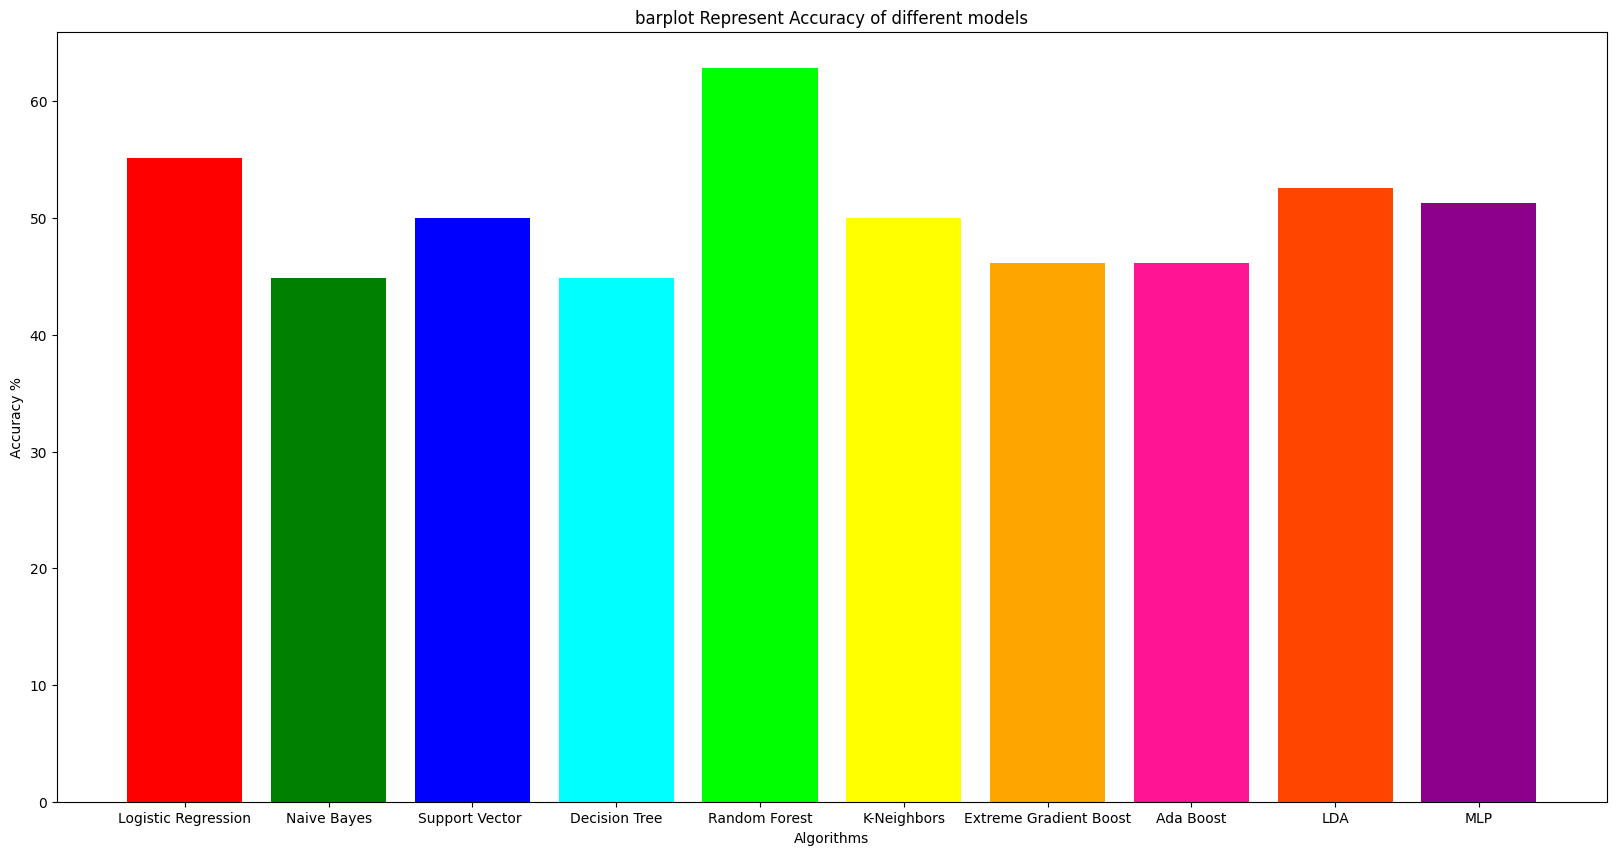

In [99]:
[a,d] = Main(bestData,bestData.columns[:-1])